**Keras Tutorial: The Ultimate Beginner’s Guide to Deep Learning in Python**  
https://elitedatascience.com/keras-tutorial-deep-learning-in-python

Import libraries and modules

In [1]:
# NumPy
import numpy as np
np.random.seed(123) # for reproducibility
# Keras model module
from keras.models import Sequential
# Keras core layers
from keras.layers import Dense, Dropout, Activation, Flatten
# Keras CNN layers
from keras.layers import Convolution2D, MaxPooling2D
# Utilities
from keras.utils import np_utils
# Matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


Load image data from MNIST

(60000, 28, 28)


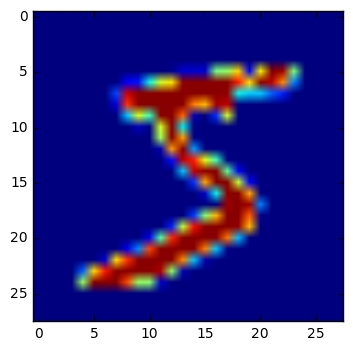

In [2]:
# Load MNIST data
from keras.datasets import mnist

# Load pre-shuffled MNIST data in train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Look at the shape of the dataset
print(X_train.shape) # 60000 saples, 28x28 pixel images

# Plot first sample of X_train in matplotlib to confirm above
plt.imshow(X_train[0])

Preprocess input data for Keras

When using the Theano backend, you must explicitly declare a dimension for the depth of the input image. For example, a full-color image with all 3 RGB channels will have a depth of 3.  

Our MNIST images only have a depth of 1, but we must explicitly declare that.  

In other words, we want to transform our dataset from having shape (n, width, height) to (n, depth, width, height).  

In [3]:
# Reshape input data
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# Print X_train's dimensions again to confirm
print(X_train.shape)
# Convert our data type to float32 and normalize to [0,1]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
# Now our input data are ready for modeling

(60000, 1, 28, 28)


Preprocess class labels for Keras

In [4]:
# Take a look at the shape of our class label data
Y_train.shape
# 10 different classes, but only a 1-dimensional array
# Take a look at the labels for the first 10 training samples
print(Y_train[:10]) # Fix this,
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)
print(Y_train.shape)
print(Y_train[0])

[5 0 4 1 9 2 1 3 1 4]
(60000, 10)
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


Define model architecture

Example implementations in Keras:
https://github.com/fchollet/keras/tree/master/examples

In [5]:
# Declare sequential model format
model = Sequential()
# Declare the input layer
# Number of conv filters to use, number of rows in each conv kernel, number of columns in each conv kernel
# depth,width,height of each image
# step size is (1,1) by default
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28), dim_ordering='th'))
# Print the shape of the current model output
print(model.output_shape)
# Add more layers to our model
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# Dropout layer is a method for regularizing our model to prevent overfitting
# MaxPooling2D is a way to reduce the number of parameters in our model by sliding a 2x2 pooling filter across
# the previous layer and taking the max of the 4 values in the 2x2 filter
# so far, for model parameters, we've added two Convolution layers
# To complete the model architecture, let's add a fully connected layer and then the output layer
# Fully connected Dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# For Dense layers, the first parameter is the output size of the layer. 
# Keras automatically handles the connections between layers.
# Note that the final layer has an output size of 10, corresponding to the 10 classes of digits.
# Also note that the weights from the Convolution layers must be flattened (made 1-dimensional) 
# before passing them to the fully connected Dense layer.


(None, 32, 26, 26)


Compile model

In [6]:
# Declare the loss function and the optimizer (SGD, Adam, etc.)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Fit model on training data

In [7]:
# Fit Keras model
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 148s - loss: 0.2674 - acc: 0.9188   
Epoch 2/10
60000/60000 [==============================] - 145s - loss: 0.1119 - acc: 0.9672   
Epoch 3/10
60000/60000 [==============================] - 152s - loss: 0.0855 - acc: 0.9744   
Epoch 4/10
60000/60000 [==============================] - 150s - loss: 0.0690 - acc: 0.9793   
Epoch 5/10
60000/60000 [==============================] - 155s - loss: 0.0595 - acc: 0.9822   
Epoch 6/10
60000/60000 [==============================] - 156s - loss: 0.0540 - acc: 0.9838   
Epoch 7/10
60000/60000 [==============================] - 154s - loss: 0.0494 - acc: 0.9850   
Epoch 8/10
60000/60000 [==============================] - 152s - loss: 0.0435 - acc: 0.9865   
Epoch 9/10
60000/60000 [==============================] - 150s - loss: 0.0408 - acc: 0.9870   
Epoch 10/10
60000/60000 [==============================] - 149s - loss: 0.0357 - acc: 0.9893   


Evaluate the model on test data

In [9]:
# Evaluate Keras model
score = model.evaluate(X_test, Y_test, verbose=0)

In [10]:
score

[0.03157291894544146, 0.99099999999999999]

CS231n: Convolutional Neural Networks for Visual Recognition: http://cs231n.stanford.edu/